# 9 . 텍스트를 위한 신경망 RNN

## 9.1 순차 데이터와 순환 신경망

### 9.1.1 순차데이터

텍스트 또는 시계열데이터  (sequential data, time series data)

*   Feedforward neural network FFNN : 입력데이터가 앞으로만 전달 (합성곱, 완전신경망)
*   Recurrent neural network RNN : 순환고리가 포함됨, 뉴런의 출력을 자기자신으로 전달
*   GAN, 
*   RBF

### 9.1.2 순환 신경망







---
<< 순환신경망  >>
* 순환신경망은 이전 기억을 가지고 있다. 타임스텝  timestep
* 순환신경망에서는 층 layer를 셀 cell로 부른다. 모든 뉴런을 표기하는 대신 하나의 셀로 층을 표시. 셀의 출력은 은닉상태 (hidden state)
* 활성화 함수 : tanh (하이퍼볼릭 탄젠트 함수) 탠에이치 (-1~1) 쌍곡선 함수의 일종
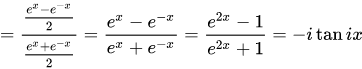

* 순환 신경망은 추가적인 가중치 : 이전 타임스텝의 은닉 상태에 곱해지는 가중치 
* 은닉상태 : 순환망에서의 셀의 출력
* 합성곱은 3차원,  순환층은 2개의 차원 타입스텝과 단어표현
* 시퀀스 : 하나의 샘플
* 시퀀스의 길이 : 타입스텝의 길이
* 순환층을 통과하면, (샘플수, 타입스텝(시퀀스길이), 단어표현) 이 (샘플수, 뉴런개수)로 출력된다. 
* 순환층을 겹칠 경우,  중간 셀은 모든 타입스텝의 은닉상태를 출력하고 마지막 셀은 마지막 타임스텝의 은닉상태만 출력


### 9.1.3 셀의 가중치와 입출력

## 9.2 순환 신경망으로 IMDB 리뷰 분류하기

### 9.2.1 IMDB 리뷰 데이터셋

#### 자연어 처리
* 자연어 처리 Natural Language Processing : 음성인식, 기계번역, 감성분석
* 말뭉치 coupus : 훈련데이터
* 단어는 숫자로 매핑,  단어를 토큰 token으로 부름
* 토큰 예약 : 0 패딩, 1 문장의 시작, 2 어휘사전에 없는 토큰
* 한글은 현태소 분석


IMDB 리뷰 데이터셋

* 텐서플로우에 데이터셋이 있음. 
* 총 5만개의 데이터 (훈련 2.5만, 테스트 2.5만)
* 예제에서는 500개의 단어만 사용 (imdb.load_data() )

In [ ]:
# 9.2.1.1 IMDB 데이터 적재
# 텐서플로는 단어를 정수로 매핑해서 반환하며, 사용하는 단어 수를 지정한다. 
# num_words = 500

from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) 
                      = imdb.load_data( ***)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
# 9.2.1.2 훈련데이터와 시험데이터 크기 확인
print (train_input.shape, test_input.shape)

In [ ]:
# 9.2.1.3 샘플마다 길이 (=단어수 = 아이템수)가 달라서 배열의 각 항목은 리스트에 담긴다. 
# 첫 번째 샘플과 두 번째 샘플의 길이 출력
len(train_input[0]) , len(train_input[1])

In [ ]:
# 9.2.1.4 첫 번째 리뷰에 담긴 내용 출력
print(train_input[0])

In [ ]:
# 9.2.1.5 타깃층 데이터 출력 : 0-부정, 1-긍정 , 이진 분류 문제
print ( train_target[:20])

In [ ]:
# 9.2.1.6 검증 데이터 분할
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size = 0.2, random_state = 42
)

In [ ]:
# 9.2.1.7 분석 대상 규모를 정하기 위해서 단어 길이의 분포와 중위수, 평균을 구한다. 
# 이를 위해 샘플별 단어 길이 세기
import numpy as np
lengths = np.array([len(ti) for ti in train_input ])
lengths, len(lengths)

In [ ]:
# 9.2.1.8 단어 길이 평균 최대 최소 중위수
np.mean(lengths), np.max(lengths), np.min(lengths), np.median(lengths)

(239.00925, 1854, 11, 178.0)

In [ ]:
# 9.2.1.9 단어 길이의 분포
import matplotlib.pyplot as plt
plt.hist(lengths, bins = 30)
plt.title ('Distribution of sample length')
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

* 그래프로 부터 100개의 단어만 분석하기로 결정. 100개보다 짧은 길이를 갖는 샘플은 0으로 패딩

In [ ]:
# 9.2.1.10 100개 단어 사용의 결정. 패딩 수행
# pad_sequences 함수는 시퀀스의 길이를 100으로 정리한다. (자르거나 채우거나)

from tensorflow.keras.preprocessing.sequence import ***
train_seq = *** (train_input, maxlen = ***)
print(train_seq.shape)  # 패딩 된 결과의 출력


(20000, 100)


In [ ]:
# 9.2.1.11 정돈된 train_seq의 첫 번째 시퀀스 출력
print (train_seq[0])

* 시퀀스 앞 뒤에 0 이 없는 것으로 보아 100단어보다 길었던 것으로 예상된다. 앞이 짤렸을까? 뒤가 짤렸을까?

In [ ]:
# 9.2.1.12  원 데이터의 마지막 부분 출력
print (train_input[0][-10:])

* 뒷 부분이 일치하므로 앞 부분을 자른 것이다.  뒷 부분의 정보가 더 유용하리라 기대하기 때문이다. 
* 뒷 부분을 자르고 싶다면 pad_sequences() 함수의 truncating 매개변수를 'pre'에서 'post'로 변경한다. 

In [ ]:
# 9.2.1.13 train_seq의 6번째 샘플 출력
print (train_seq[5])

* 길이를 정리할 때, 채우는 것도 앞에서 채움,  은닉층을 통과 할 때 뒤로 갈 수록 중요하게 처리.

In [ ]:
# 9.2.1.14 검증데이터에 대해서도 동일한 처리를 수행 (길이 100으로 정리)
val_seq = pad_sequences(***, maxlen = 100)

### 9.2.2 순환 신경망 만들기

#### SimpleRNN(ohe)

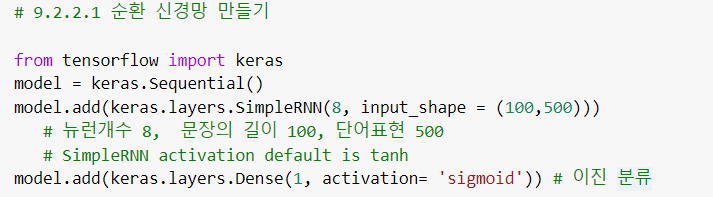

In [ ]:
# 9.2.2.1 순환 신경망 만들기 

***
   # 뉴런개수 8,  문장의 길이 100, 단어표현 500
   # SimpleRNN activation default is tanh
***  # 이진 분류

In [ ]:
# 9.2.2.2 입력 데이터를 자료형을 one-hot-encoding으로 변환
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape, train_seq.shape)  #  (20000,100,500)    (20000,100)

(20000, 100, 500) (20000, 100)


* one-hot-encoding을 통해 정수 사이의 크기 속성을 무시 할 수 있게 됨

In [ ]:
# 9.2.2.3 첫 번째 샘플의 첫 번째 값 10의 정상적인 인코딩 여부 확인
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
# 9.2.2.4 오직 하나만 1을 갖는지 확인
np.sum(train_oh[0][0])

1.0

In [ ]:
# 9.2.2.5 검증 데이터도 one-hot-encoding 변환
val_oh = keras.utils.to_categorical(val_seq)

In [ ]:
# 9.2.2.6 모델 요약 정보 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


* $w_x $ 500 data x 8 neuron = 4000
* $w_h $ 8 neuron recurrent : 8 x 8 = 64
* $b  $ bias for each neuron 8
* 4,072 for simple RNN

### 9.2.3 순환 신경망 훈련하기 

* 학습 설정
> * RMSprop (Root Mean Squared Propagation) 으로 학습
> * 기본 학습률 0.001이 아닌 0.0001을 지정하기 위해 RMRprop 객체를 생성
* 훈련
> * epochs = 100
> * batch_size = 64
> * 콜백  : ModelCheckpoint, EarlyStopping

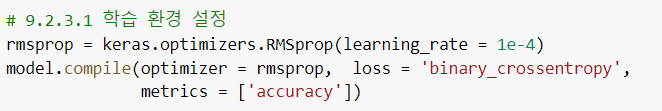

In [ ]:
# 9.2.3.1 학습 환경 설정
***

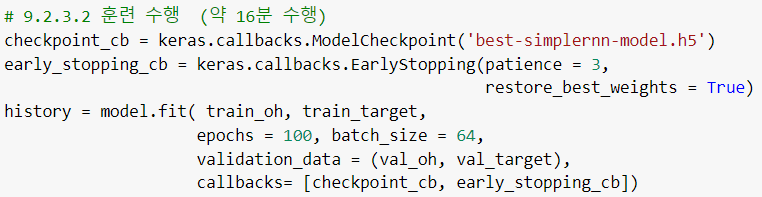

In [ ]:
# 9.2.3.2 훈련 수행  (약 16분 수행)
checkpoint_cb = keras.callbacks.ModelCheckpoint('***.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = ***, 
                                                  restore_best_weights = ***)
history = model.fit( ***, ***,
                    epochs = ***, batch_size = ***,
                    validation_data = (***, ***),
                    callbacks= [checkpoint_cb, early_stopping_cb])

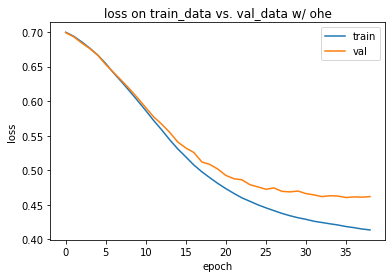

In [ ]:
# 9.2.3.3 훈련 손실, 검증 손실 비교
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title ('loss on train_data vs. val_data w/ ohe')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
# 9.2.3.4 one-hot=encoding 의 단점은 입력데이터의 크기가 방대해진다는 것이다. 
print (f'train_seq size : {train_seq.nbytes:,},\n train_oh size {train_oh.nbytes:,}')

train_seq size : 8,000,000,
 train_oh size 4,000,000,000


### 9.2.4 단어 임베딩 사용하기 

#### SimpleRNN (we)

* one-hot encoding의 단점을 보완하기 위해 '단어 임베딩'을 사용한다. 
* 단어 임베딩은 각 단어를 고정된 크기의 실수 벡터로 변환한다. 
* 단어 임베딩은 one-hot-encoding 벡터보다 의미있는 값으로 채워져 자연어 처리에서 좋은 성능을 내는 경우가 많다. 
* keras의 Embedding 클래스 
* 단어 임베딩 클래스도 훈련을 통해 학습하고 벡터의 성능이 좋아진다. 
* 단어 임베딩의 장점은 입력으로 정수데이터를 받는다는 점이다.  (train_seq 사용가능) 

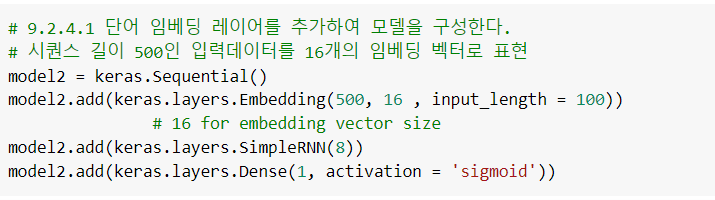

In [ ]:
# 9.2.4.1 단어 임베딩 레이어를 추가하여 모델을 구성한다. 
# 시퀀스 길이 500인 입력데이터를 16개의 임베딩 벡터로 표현 
model2 = keras.Sequential()
model2.add(***)  
               # 16 for embedding vector size
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
# 9.2.4.2 모델 구조 출력
model2.summary()

* embedding : 500 x 16 = 8000 for changing embedding vector : 500개의 단어표현 정수를 16개 항이 있는 벡터로 변경
* RNN 층
> * $w_x$ 16 dim x 8  neuron = 128
> * $w_h$ 8 x 8 = 64  for recurrsion 
> * $b$ 8 for bias
> * 128 + 64 + 8 = 200

In [ ]:
# 9.2.4.3 학습 환경 설정 
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss= 'binary_crossentropy',
               metrics = ['accuracy'])

In [ ]:
# 9.2.4.4 훈련 수행  (훈련 수행 결과를 'best-embedding-model.h5' 에 저장)
checkpoint_cb = keras.callbacks.ModelCheckpoint( *** )
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, 
                                                  restore_best_weights = True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                     validation_data = (val_seq, val_target),
                     callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 32s 100ms/step - loss: 0.6961 - accuracy: 0.5021 - val_loss: 0.6927 - val_accuracy: 0.5148
Epoch 2/100
313/313 [==============================] - 31s 100ms/step - loss: 0.6900 - accuracy: 0.5281 - val_loss: 0.6872 - val_accuracy: 0.5442
Epoch 3/100
313/313 [==============================] - 32s 102ms/step - loss: 0.6812 - accuracy: 0.5734 - val_loss: 0.6758 - val_accuracy: 0.5912
Epoch 4/100
313/313 [==============================] - 31s 100ms/step - loss: 0.6671 - accuracy: 0.6072 - val_loss: 0.6651 - val_accuracy: 0.6040
Epoch 5/100
313/313 [==============================] - 31s 99ms/step - loss: 0.6554 - accuracy: 0.6240 - val_loss: 0.6585 - val_accuracy: 0.6198
Epoch 6/100
313/313 [==============================] - 31s 99ms/step - loss: 0.6454 - accuracy: 0.6422 - val_loss: 0.6516 - val_accuracy: 0.6246
Epoch 7/100
313/313 [==============================] - 32s 102ms/step - loss: 0.6367 - accuracy: 0.6507 - val_loss: 0.6458 - v

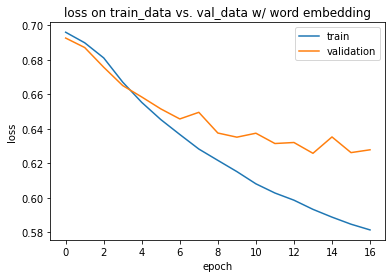

In [ ]:
# 9.2.4.5 훈련손실, 검증 손실 비교
plt.plot (history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title ('loss on train_data vs. val_data w/ word embedding')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

## 9.3 LTSM과 GRU 셀

### 9.3.1 LSTM 구조 
* Long Short-Term Memory
* hidden-state h , cell-state c

### 9.3.2 LSTM 신경망 훈련하기

In [ ]:
# 9.3.2.1 IMDB 데이터셋 준비, 500개 단어 활용, 검증데이터 20% 분리

from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words = 500
)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size = 0.2, random_state = 42
)

In [ ]:
# 9.3.2.2 단어 길이 100으로 패딩 (훈련데이터, 검증데이터 )
from tensorflow.keras.preprocessing.sequence import ***
train_seq = pad_sequences (train_input, maxlen = 100)
val_seq = pad_sequences (***)

#### LSTM (we)

In [ ]:
# 9.3.2.3 LSTM 순환층으로 신경망 구성 (뉴런 개수 8개)
# 단어임베딩 (16개 단어임베딩 벡터) 포함
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.***(500, 16, input_length=100))
model.add(keras.layers.***(8))
model.add(keras.layers.***(1, activation = 'sigmoid'))

In [ ]:
# 9.3.2.4 모델 요약정보 출력
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


* LSTM에는 작은 셀이 4개 있는 구조이므로 simpleRNN의 4배 (200  x 4 = 800)

In [ ]:
# 9.3.2.5 학습환경 설정 및 훈련 수행
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = ***, loss = '***',
              metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb= keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)
history = model.fit (train_seq, train_target, epochs=100, batch_size = 64,
                     validation_data = (val_seq, val_target),
                     callbacks = [checkpoint_cb, early_stopping_cb])

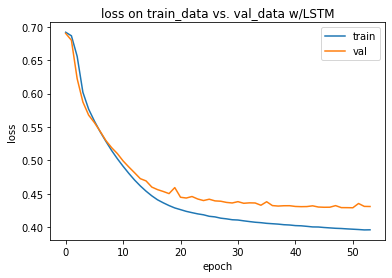

In [ ]:
# 9.3.2.6 훈련손실, 검증 손실 비교
import matplotlib.pyplot as plt

plt.plot (history.history['loss'])
plt.plot (history.history['val_loss'])
plt.title ('loss on train_data vs. val_data w/LSTM')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### 9.3.3 순환층에 드롭아웃 적용하기

#### LSTM with dropout 0.3 (we)

In [ ]:
# 9.3.3.1 LSTM 순환층으로 신경망 구성 (뉴런 개수 8개)
# dropout 0.3 적용

model2 = keras.Sequential()
model2.add(keras.layers.***(500, 16, input_length = 100))
model2.add(keras.layers.***(8, dropout=***))
model2.add(keras.layers.***(1, activation = 'sigmoid'))

In [ ]:
# 9.3.3.2 학습환경 설정 및 훈련 수행
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile (optimizer = rmsprop, loss= 'binary_crossentropy', 
                metrics = ['accuracy'])

checkpoint_cb=keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit (train_seq, train_target, epochs = 100, batch_size = 64,
            validation_data=(val_seq, val_target),
            callbacks = [checkpoint_cb, early_stopping_cb])

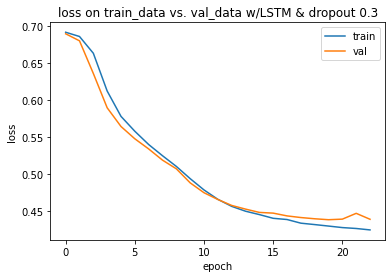

In [ ]:
# 9.3.3.3 훈련손실, 검증 손실 비교
plt.plot (history.history['loss'])
plt.plot (history.history['val_loss'])
plt.title ('loss on train_data vs. val_data w/LSTM & dropout 0.3')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### 9.3.4 2개의 층을 연결하기 

#### Double LSTM with d/o 0.3 (we)

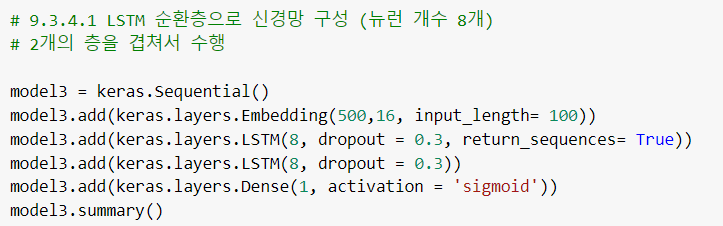

In [ ]:
# 9.3.4.1 LSTM 순환층으로 신경망 구성 (뉴런 개수 8개)
# 2개의 층을 겹쳐서 수행 

model3 = keras.Sequential()
model3.add(keras.layers.Embedding(*** ,  **, input_length=  **))
model3.add(keras.layers.LSTM(*, dropout = **, ****))
model3.add(keras.layers.LSTM(*, dropout = **))
model3.add(keras.layers.Dense(*, activation = '***'))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 9.3.4.2 학습환경 설정 및 훈련 수행
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop,  loss = 'binary_crossentropy',
               metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights= True)
history = model3.fit (train_seq, train_target, epochs = 100, batch_size=64,
            validation_data = (val_seq, val_target),
            callbacks = [checkpoint_cb, early_stopping_cb])

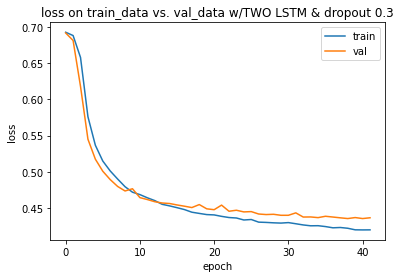

In [ ]:
# 9.3.4.3 훈련손실, 검증 손실 비교
plt.plot (history.history['loss'])
plt.plot (history.history['val_loss'])
plt.title ('loss on train_data vs. val_data w/TWO LSTM & dropout 0.3')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### 9.3.5 GRU 구조
* Gated Recurrent Unit

### 9.3.6 GRU 신경망 훈련하기

#### GRU (we)

In [ ]:
# 9.3.6.1 GRU셀 순환층으로 신경망 구성 (뉴런 개수 8개)
model4 = keras.Sequential()
model4.add (keras.layers.Embedding(500,16, input_length = 100))
model4.add(keras.layers.*** (8))
model4.add(keras.layers.Dense(1, activation = 'sigmoid'))
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 9.3.6.2 학습환경 설정 및 훈련 수행
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer = rmsprop,  loss = 'binary_crossentropy',
               metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights= True)
history = model4.fit (train_seq, train_target, epochs = 100, batch_size=64,
            validation_data = (val_seq, val_target),
            callbacks = [checkpoint_cb, early_stopping_cb])

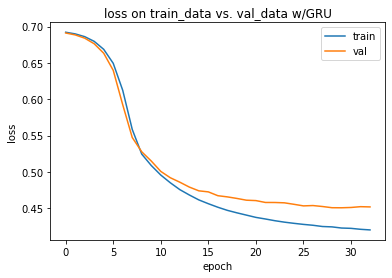

In [ ]:
# 9.3.6.3 훈련손실, 검증 손실 비교
plt.plot (history.history['loss'])
plt.plot (history.history['val_loss'])
plt.title ('loss on train_data vs. val_data w/GRU')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### 9.3.7 LSTM과 GRU 셀로 훈련

In [ ]:
# 9.3.7.1 가장 검증 성능이 좋았던 2개 LSTM 순환층 모델을 적재하고, 시험데이터로 성능을 평가 한다. 
###  가장 검증 성능이 좋았던 모델 : 'best-2rnn-model.h5'
test_seq = pad_sequences(*** , maxlen=100)
rnn_model = keras.models.load_model(  *** )
rnn_model.evaluate(***, ***)